In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

# 1

In [121]:
def contrast_sensitivity_function(width, height, resolution1, resolution2, distance):
    rd = (6*width/resolution1)/math.tan(0.5*math.pi/180)
    if(rd > distance):
        return distance
    else:
        return rd
rd = contrast_sensitivity_function(100, 50, 3840, 2160, 20)
print("The required distance:", rd)

The required distance: 17.904476582704625


# 2

In [99]:
aerial = mpimg.imread("C:/Users/kamuj/Downloads/ivp assignment1/5.2.09.tiff")
airplane = mpimg.imread("C:/Users/kamuj/Downloads/ivp assignment1/7.1.02.tiff")
apc = mpimg.imread("C:/Users/kamuj/Downloads/ivp assignment1/7.1.08.tiff")

In [3]:
print(aerial.shape, airplane, apc)

(512, 512) [[159 155 140 ... 175 164 167]
 [157 157 148 ... 175 172 175]
 [159 150 157 ... 172 169 169]
 ...
 [189 186 186 ... 189 189 189]
 [189 189 189 ... 189 189 189]
 [189 192 192 ... 183 189 189]] [[133 133 131 ... 130 126 118]
 [130 123 133 ... 126 126 124]
 [124 121 121 ... 128 126 126]
 ...
 [154 156 154 ... 150 152 150]
 [152 154 154 ... 154 154 156]
 [154 156 154 ... 154 147 145]]


In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Display the first image in th5e first subplot
axs[0].imshow(aerial, cmap='gray')  # Adjust 'cmap' accordingly
axs[0].set_title('Aerial')

# Display the second image in the second subplot
axs[1].imshow(airplane, cmap='gray')  # Adjust 'cmap' accordingly
axs[1].set_title('Airplane')

# Display the third image in the third subplot
axs[2].imshow(apc, cmap='gray')  # Adjust 'cmap' accordingly
axs[2].set_title('APC')

Text(0.5, 1.0, 'APC')

In [5]:
def max_min(array):
    print(f"Maximum and Minimum value of the pixels in the given image is {np.max(array)} and {np.min(array)}")
    print(f"Dimesions of the image is {array.shape}")
max_min(aerial)
max_min(airplane)
max_min(apc)
print(f"Number of bits needs to represent each pixel {np.log2(256)}")

Maximum and Minimum value of the pixels in the given image is 255 and 12
Dimesions of the image is (512, 512)
Maximum and Minimum value of the pixels in the given image is 250 and 3
Dimesions of the image is (512, 512)
Maximum and Minimum value of the pixels in the given image is 215 and 12
Dimesions of the image is (512, 512)
Number of bits needs to represent each pixel 8.0


In [6]:
import os
print(f"size of the aerial image is {os.stat('C:/Users/kamuj/Downloads/ivp assignment1/5.2.09.tiff').st_size}")
print(f"size of the airplane image is {os.stat('C:/Users/kamuj/Downloads/ivp assignment1/7.1.02.tiff').st_size}")
print(f"size of the apc image is {os.stat('C:/Users/kamuj/Downloads/ivp assignment1/7.1.08.tiff').st_size}")

size of the aerial image is 262278
size of the airplane image is 262278
size of the apc image is 262278


In [7]:
print(f"The size of the image theoretically is {512*512} bytes")

The size of the image theoretically is 262144 bytes


100.051116943359375 is the compression efficiency


Here we can see that the image is not compressed

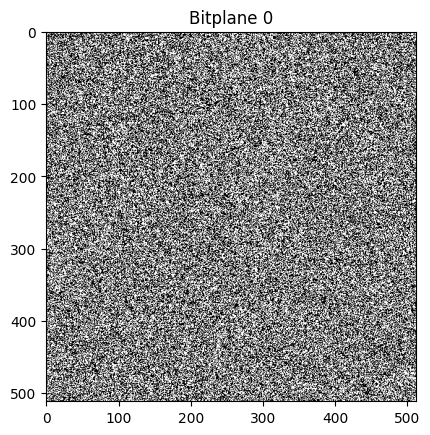

In [8]:
def bit_func(image, bitplane_index):
    bitplane = (image >> bitplane_index) & 1
    # Display the binary image
#     print(image)
#     print(bitplane)
    plt.imshow(bitplane, cmap='gray', vmin=0, vmax=1)
    plt.title('Bitplane {}'.format(bitplane_index))
    plt.show()
    
bit_func(aerial,0)
bit_func(airplane, 7)
bit_func(apc, 3)

# 3

In [9]:
truck = mpimg.imread("C:/Users/kamuj/Downloads/ivp assignment1/7.1.01.tiff")
airport = mpimg.imread("C:/Users/kamuj/Downloads/ivp assignment1/5.3.02.tiff")

Text(0.5, 1.0, 'Airport')

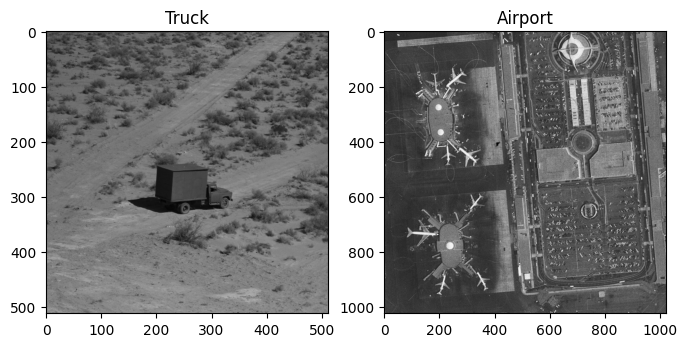

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Display the first image in the first subplot
axs[0].imshow(truck, cmap='gray')  # Adjust 'cmap' accordingly
axs[0].set_title('Truck')

# Display the second image in the second subplot
axs[1].imshow(airport, cmap='gray')  # Adjust 'cmap' accordingly
axs[1].set_title('Airport')

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def histogram(image, image_name):
    # Flatten the image to a 1D array
    flat_image = image.flatten()

    # Compute the histogram using NumPy
    histogram, bins = np.histogram(flat_image, bins=256, range=(0, 256))
    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.bar(bins[:-1], histogram, width=1, edgecolor='black')
    plt.title(f'Histogram of {image_name}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()


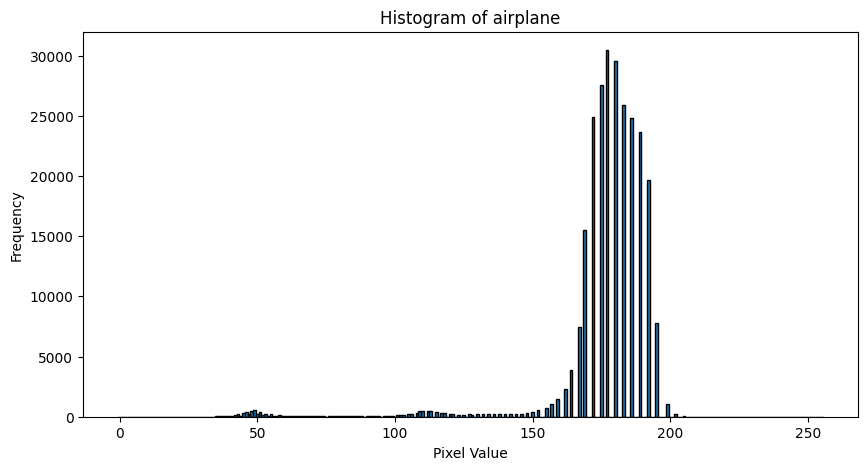

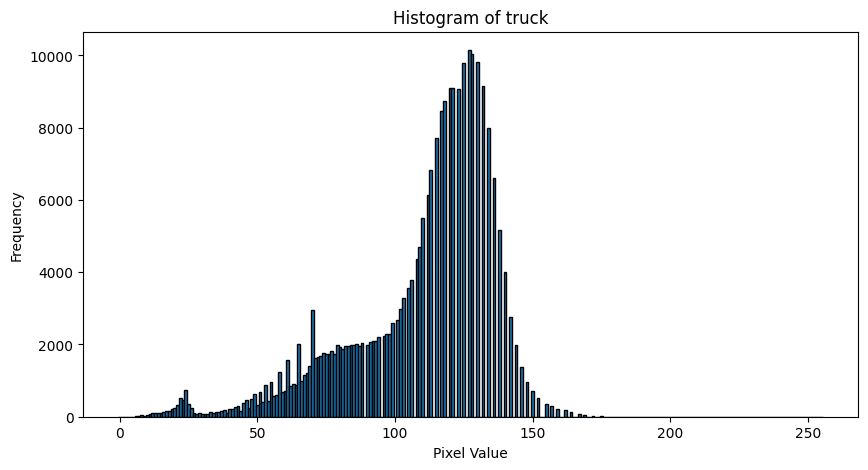

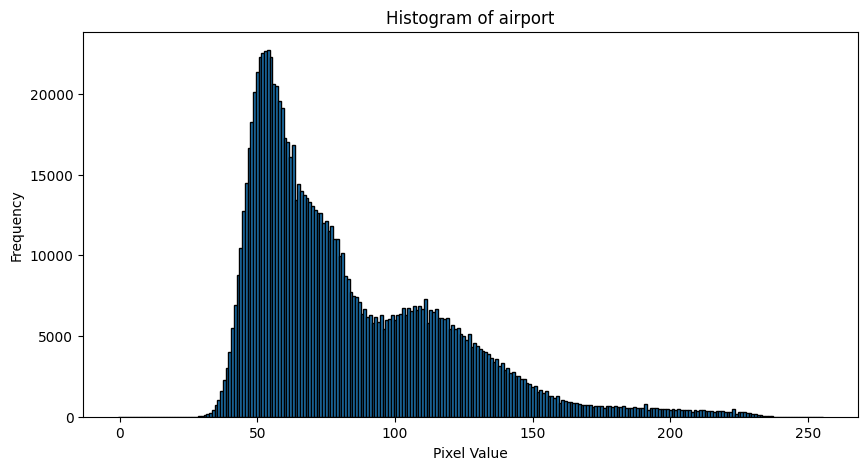

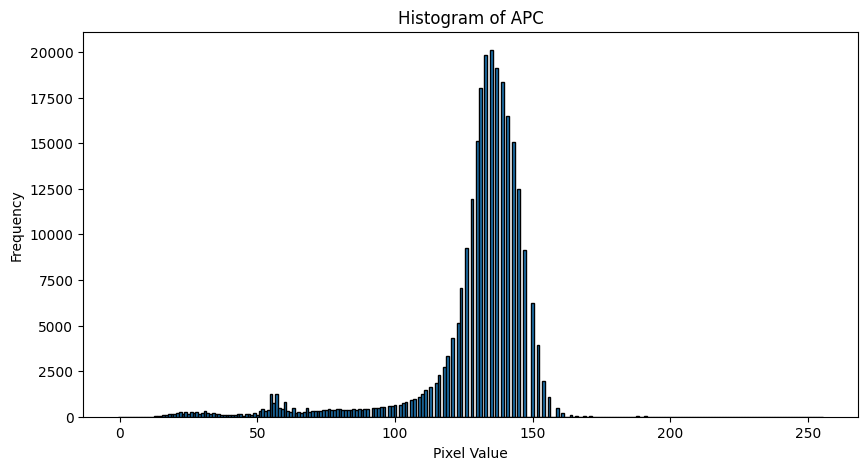

In [12]:
histogram(airplane, "airplane")
histogram(truck, "truck")
histogram(airport, "airport")
histogram(apc, "APC")

From the above images we can see that the airplane, truck, APC are unimodal images and airport is bimodal image

In [125]:
def binarize(image, image_name):
    flat_image = image.flatten()
    histogram, bins = np.histogram(flat_image, bins=256, range=(0, 256))

    # Find the modes (peaks) in the histogram
    modes = np.where(histogram == max(histogram))[0]
    threshold = np.argmax(histogram)

    # Binarize the image using the computed threshold
    binary_image = (image > threshold).astype(np.uint8)
    
    plt.imshow(image, cmap='gray')
    plt.title(f'Original {image_name}')
    print(f"Mode for {image_name} is {modes}")
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Binarized {image_name} (Modal Thresholding)')
    plt.show()

Mode for airplane is [177]


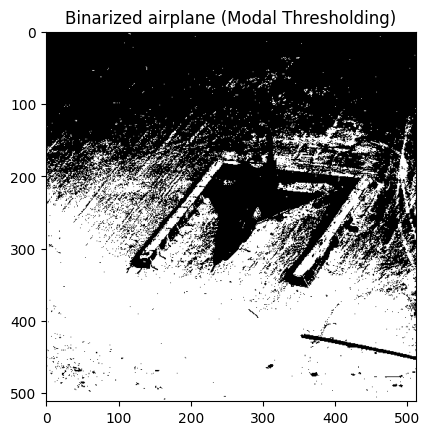

Mode for truck is [127]


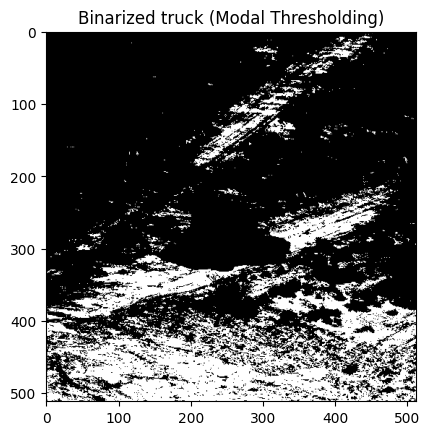

Mode for airport is [54]


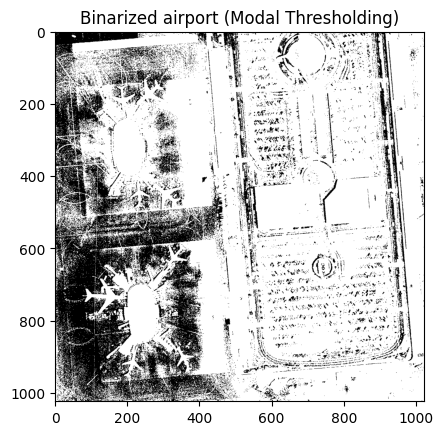

Mode for APC is [135]


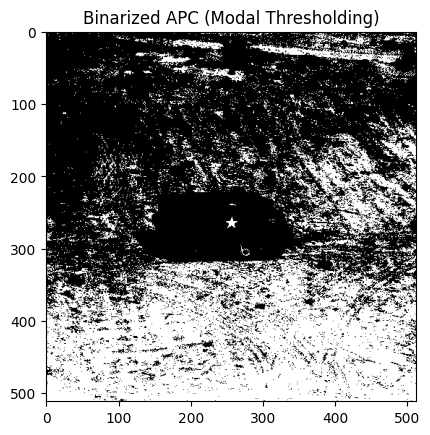

In [126]:
binarize(airplane, "airplane")
binarize(truck, "truck")
binarize(airport, "airport")
binarize(apc, "APC")

1.0


C:\Users\kamuj\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\kamuj\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\kamuj\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


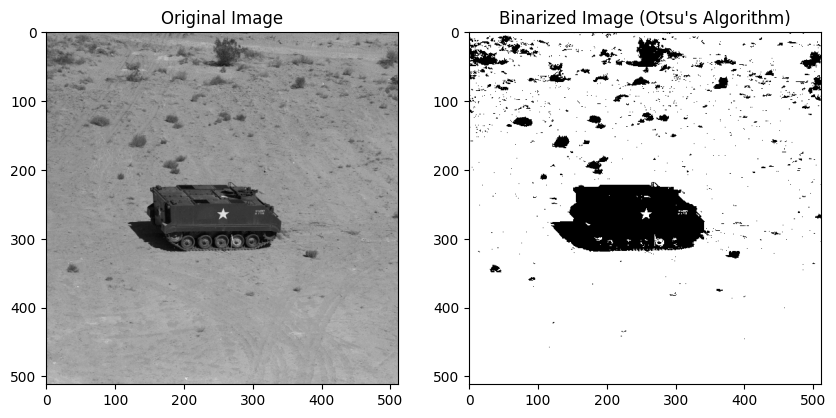

Optimal Threshold for apc:100
1.0


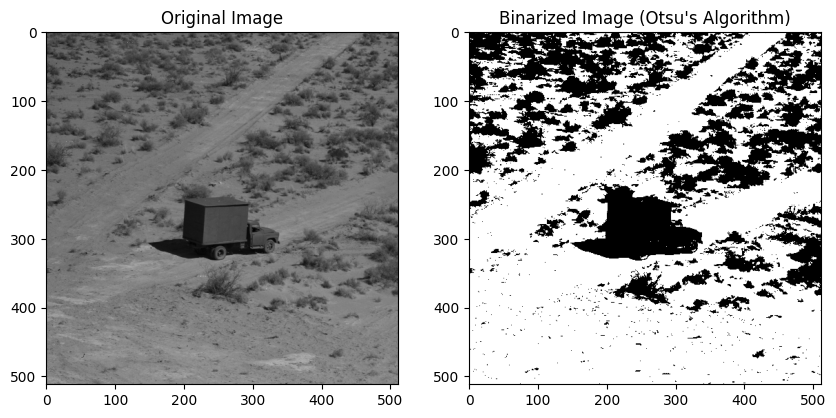

Optimal Threshold for truck:97


In [129]:
def otsu_algorithm(image, image_name):
    # Compute histogram
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    flat_image = image.flatten()
#     flat_image = sort(flat_image)
    flat_image.sort()
    print(np.sum(histogram))
    # Calculate the probability arrays
    p0_t = np.zeros(256)
    p1_t = np.zeros(256)

    for t in range(256):
        p0_t[t] = np.sum(histogram[:t])
        p1_t[t] = 1 - p0_t[t]

    # Initialize variables to store optimal threshold and minimum weighted intra-class variance
    optimal_threshold = 0
    min_variance = float('inf')

    for t in range(0, 256):
        # Compute probability of gray levels 0 and 1
        P0_t = p0_t[t]
        P1_t = p1_t[t]

#         # Compute mean of gray levels 0 and 1
        mean0_t = np.sum(histogram[:t])
        mean1_t = np.sum(histogram[t:])

        # Compute variance of gray levels 0 and 1
        var0_t = np.var(flat_image[:round(mean0_t*flat_image.size)])
        var1_t = np.var(flat_image[round(mean0_t*flat_image.size):])
#         var0_t = np.var(histogram[:t])
#         var1_t = np.var(histogram[t:])

        # Compute weighted intra-class variance
        sigma_w_t = P0_t * var0_t + P1_t * var1_t

        # Update optimal threshold if the current threshold minimizes the variance
        if sigma_w_t < min_variance:
            min_variance = sigma_w_t
            optimal_threshold = t
    
    # Binarize the image using the optimal threshold
    binary_image = (image > optimal_threshold).astype(np.uint8)
    
    # Display the original and binarized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binarized Image (Otsu\'s Algorithm)')
    plt.show()
    
    print(f"Optimal Threshold for {image_name}:{optimal_threshold}")
#     return optimal_threshold+1
    return

optimal_threshold = otsu_algorithm(apc, "apc")
optimal_threshold = otsu_algorithm(truck, "truck")

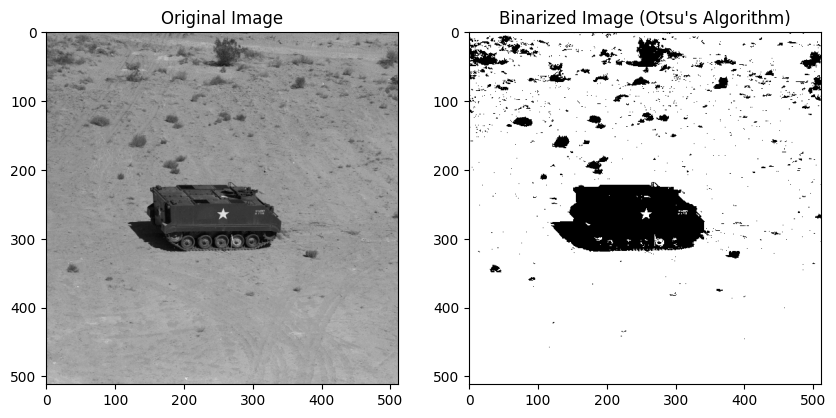

Optimal Threshold for APC: 100


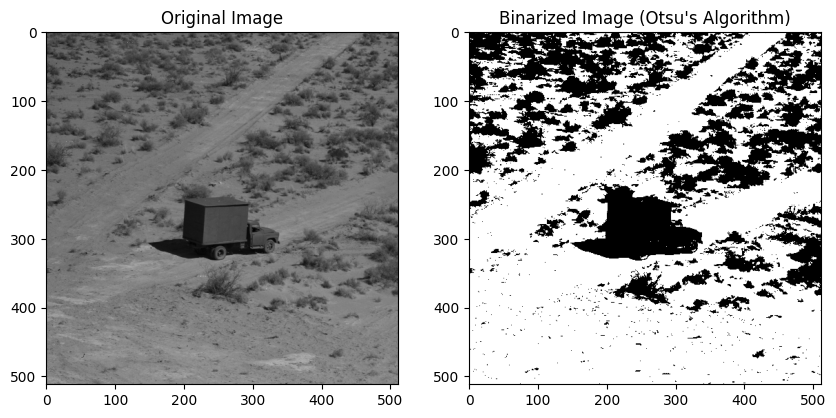

Optimal Threshold for Truck: 97


In [128]:
import numpy as np

def otsu_recursive(image, image_name):
    # Compute histogram
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    # Initialize variables
    P0 = np.zeros(256)
    P0[0] = 0
    mu0 = 0
    mu = np.sum(np.arange(256) * histogram[:])
    mu1 = mu
    
    # Initialize variables to store optimal threshold and maximum between-class variance
    optimal_threshold = 0
    max_between_class_variance = 0

    for t in range(1, 256):
        # Update P0, mu0, and mu1 recursively
        P0[t] = P0[t - 1] + histogram[t]

        # Check for zero denominators to avoid division by zero
        if P0[t] != 0 and P0[t] != 1:
            mu0 = (mu0 * (P0[t - 1]) / P0[t]) + (t * histogram[t]) / P0[t]
            mu1 = (mu - mu0 * P0[t]) / (1 - P0[t])

            # Compute between-class variance
            between_class_variance = P0[t] * (1 - P0[t]) * (mu0 - mu1)**2

            # Update optimal threshold if the current threshold maximizes the between-class variance
            if between_class_variance > max_between_class_variance:
                max_between_class_variance = between_class_variance
                optimal_threshold = t
                
    # Binarize the image using the optimal threshold
    binary_image = (image > (optimal_threshold+1)).astype(np.uint8)
    
    # Display the original and binarized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binarized Image (Otsu\'s Algorithm)')
    plt.show()
    print(f"Optimal Threshold for {image_name}: {optimal_threshold+1}")
#     return optimal_threshold+1
    return binary_image

otsu_apc = otsu_recursive(apc, "APC")
otsu_apc = otsu_recursive(truck, "Truck")

# print("Optimal Threshold:", optimal_threshold)

Number of regions: 1518
Number of regions after combining: 947


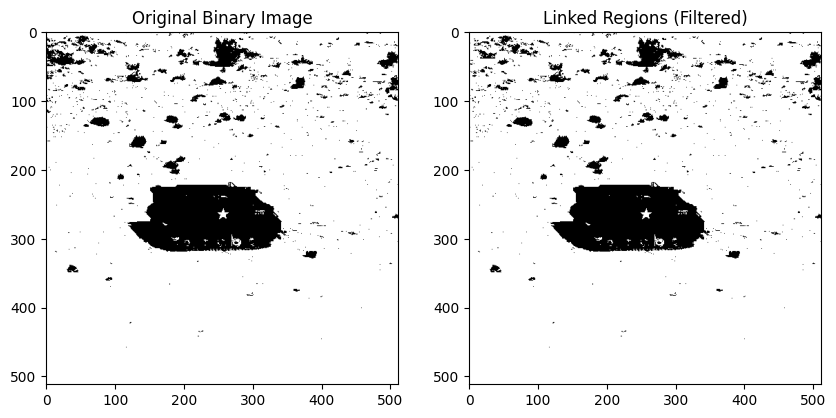

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def connectivity(binary_image, image_name, pad_value=0):
    padded_image = np.pad(binary_image, ((1, 0), (1, 0)), constant_values=pad_value)
    region = np.zeros_like(binary_image, dtype=int)
    k = 1
    size = 0
    
    for row in range(binary_image.shape[0]):
        for col in range(binary_image.shape[1]):
            if padded_image[row+1, col+1] == 0 and padded_image[row+1, col] == 1 and padded_image[row, col+1] == 1:
                region[row, col] = k
                k += 1
                size += 1
            elif padded_image[row+1, col+1] == 0 and padded_image[row+1, col] == 1 and padded_image[row, col+1] == 0:
                region[row, col] = region[row-1, col]
            elif padded_image[row+1, col+1] == 0 and padded_image[row+1, col] == 0 and padded_image[row, col+1] == 1:
                region[row, col] = region[row, col-1]
            elif padded_image[row+1, col+1] == 0 and padded_image[row+1, col] == 0 and padded_image[row, col+1] == 0:
                region[row, col] = min(region[row, col-1], region[row-1, col])
                if region[row, col-1] != region[row-1, col] and region[row, col-1] != 0 and region[row - 1, col] != 0:
                    region[region == region[row-1, col]] = region[row, col-1]
                    size -= 1
    
    print(f"Number of regions: {k-1}")
    print(f"Number of regions after combining: {size}")

    return region

# Example usage
# Assuming 'otsu_apc' is the binary image
# You can replace it with your binary image data

linked_regions = connectivity(otsu_apc, "APC")
linked_regions[linked_regions > 0] = 1

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(otsu_apc, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(np.logical_not(linked_regions), cmap='gray')
plt.title('Linked Regions (Filtered)')

plt.show()


Hence the connected component has been implemented

# 4

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def dilate_binary_image(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            if binary_image[i, j] == 1:
                result[i - structuring_element.shape[0]//2:i + structuring_element.shape[0]//2 + 1,
                       j - structuring_element.shape[1]//2:j + structuring_element.shape[1]//2 + 1] = 1

    return np.clip(result, 0, 1)

def erode_binary_image(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[i - structuring_element.shape[0]//2:i + structuring_element.shape[0]//2 + 1,
                                        j - structuring_element.shape[1]//2:j + structuring_element.shape[1]//2 + 1]
            if np.array_equal(neighborhood, structuring_element):
                result[i, j] = 1

    return result

def median_binary_image(binary_image, size):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - size//2):min(rows, i + size//2 + 1),
                                        max(0, j - size//2):min(cols, j + size//2 + 1)]
            result[i, j] = np.median(neighborhood)

    return np.where(result > 0.5, 1, 0)

# Example usage
# Assuming 'otsu_apc' is the binary image
# You can replace it with your binary image data

# Structuring elements
cross_structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
square_structuring_element = np.ones((3, 3), dtype=np.uint8)

# DILATE with CROSS(5) window
dilated_cross = dilate_binary_image(otsu_apc, cross_structuring_element)

# ERODE with CROSS(5) window
eroded_cross = erode_binary_image(otsu_apc, cross_structuring_element)

# MEDIAN with SQUARE(3) window
median_square = median_binary_image(otsu_apc, size=3)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(otsu_apc, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(dilated_cross, cmap='gray')
plt.title('DILATE (CROSS)')

plt.subplot(1, 4, 3)
plt.imshow(eroded_cross, cmap='gray')
plt.title('ERODE (CROSS)')

plt.subplot(1, 4, 4)
plt.imshow(median_square, cmap='gray')
plt.title('MEDIAN (SQUARE)')

plt.show()


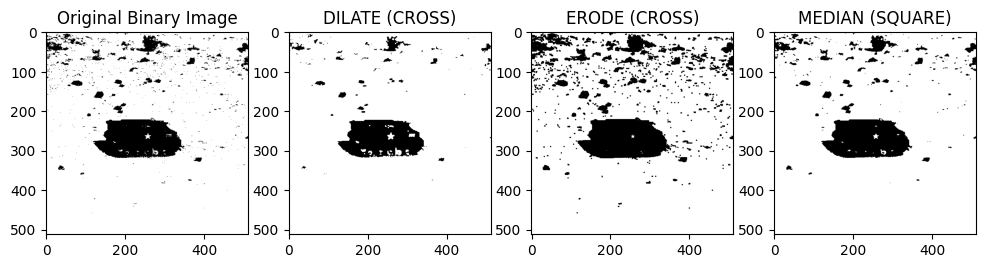

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def dilate_binary_image(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.max(neighborhood)

    return result

def erode_binary_image(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.min(neighborhood)

    return result

def median_binary_image(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.median(neighborhood)

    return np.where(result > 0.5, 1, 0)

# Example usage
# Assuming 'otsu_apc' is the binary image
# You can replace it with your binary image data

# Structuring elements
cross_structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
square_structuring_element = np.ones((3, 3), dtype=np.uint8)

# DILATE with CROSS(3) window
dilated_cross = dilate_binary_image(otsu_apc, cross_structuring_element)

# ERODE with CROSS(3) window
eroded_cross = erode_binary_image(otsu_apc, cross_structuring_element)

# MEDIAN with SQUARE(3) window
median_square = median_binary_image(otsu_apc, square_structuring_element)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(otsu_apc, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 4, 2)
plt.imshow(dilated_cross, cmap='gray')
plt.title('DILATE (CROSS)')

plt.subplot(1, 4, 3)
plt.imshow(eroded_cross, cmap='gray')
plt.title('ERODE (CROSS)')

plt.subplot(1, 4, 4)
plt.imshow(median_square, cmap='gray')
plt.title('MEDIAN (SQUARE)')

plt.show()

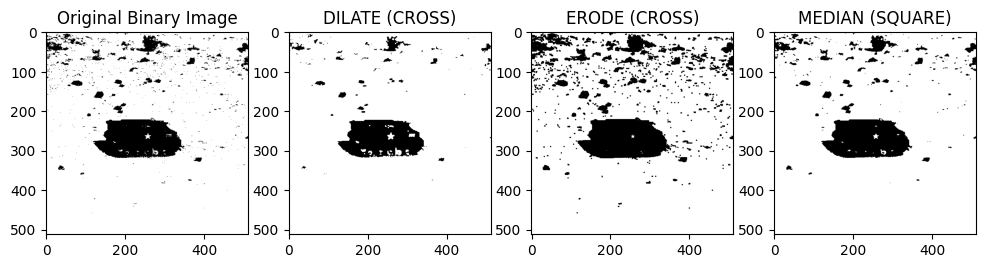

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def dilate(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.max(neighborhood)

    return result

def erode(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.min(neighborhood)

    return result

def median(binary_image, structuring_element):
    rows, cols = binary_image.shape
    result = np.zeros_like(binary_image)

    for i in range(rows):
        for j in range(cols):
            neighborhood = binary_image[max(0, i - structuring_element.shape[0]//2):min(rows, i + structuring_element.shape[0]//2 + 1),
                                        max(0, j - structuring_element.shape[1]//2):min(cols, j + structuring_element.shape[1]//2 + 1)]
            result[i, j] = np.median(neighborhood)

    return np.where(result > 0.5, 1, 0)

# Structuring elements
cross = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
square = np.ones((3, 3), dtype=np.uint8)

dilated_cross = dilate(otsu_apc, cross)
eroded_cross = erode(otsu_apc, cross)
median_square = median(otsu_apc, square)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(otsu_apc, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 4, 2)
plt.imshow(dilated_cross, cmap='gray')
plt.title('DILATE (CROSS)')

plt.subplot(1, 4, 3)
plt.imshow(eroded_cross, cmap='gray')
plt.title('ERODE (CROSS)')

plt.subplot(1, 4, 4)
plt.imshow(median_square, cmap='gray')
plt.title('MEDIAN (SQUARE)')

plt.show()

In [82]:
img2 = erode(otsu_apc, cross)
img1 = np.logical_not(dilate(np.logical_not(otsu_apc),cross))
print(np.array_equal(img1-img2, np.zeros_like(img1)))
print(img1 - img2)

True
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
img2 = dilate(otsu_apc, cross)
img1 = np.logical_not(erode(np.logical_not(otsu_apc),cross))
print(np.array_equal(img1-img2, np.zeros_like(img1)))
print(img1 - img2)

True
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
img2 = median(otsu_apc, cross)
img1 = np.logical_not(median(np.logical_not(otsu_apc),cross))
print(np.array_equal(img1-img2, np.zeros_like(img1)))
print(img1 - img2)

True


Hence we verified that the DILATE and ERODE operators are duals of each other with respect to complementation and also that the MEDIAN operator is its own dual with respect to complementation

In [87]:
def open_filter(image, filter):
    return dilate(erode(image,filter),filter)

def close_filter(image, filter):
    return erode(dilate(image,filter),filter)

In [89]:
close_image = close_filter(otsu_apc, cross)
open_image = open_filter(otsu_apc,cross)
# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(open_image, cmap='gray')
plt.title('Open Image')

plt.subplot(1, 2, 2)
plt.imshow(dilated_cross, cmap='gray')
plt.title('Close Image')

Text(0.5, 1.0, 'Close Image')

In [93]:
op_cl = open_filter(close_filter(otsu_apc,square),square) 
cl_op = close_filter(open_filter(otsu_apc,square),square) 
# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(op_cl, cmap='gray')
plt.title('OPEN-CLOS')

plt.subplot(1, 2, 2)
plt.imshow(cl_op, cmap='gray')
plt.title('CLOS-OPEN')

Text(0.5, 1.0, 'CLOS-OPEN')